<h1 style="text-align:center">Gráficos de las funciones de respuesta de frecuencia</h1>
<h3 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Rafael P. Hayde <br>
<a href="mailto:rafael.penailillo@alumnos.uach.cl">rafael.penailillo@alumos.uach.cl</a><br>
<p style="text-align:center">Github Username: rafaelphayde <br> 

Las funciones de respuesta de frecuencia (FRF) son funciones de transferencia definidas en el dominio de la frecuencia y es una de las herramientas más importantes dentro del análisis dinámico de las vibraciones. Son utilizadas para cuantificar la respuesta de un sistema debido a una excitación.

In [35]:
#Importación de libreras
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from mpl_toolkits.mplot3d import axes3d
%matplotlib widget
import ipywidgets as widgets

In [2]:
#Variables globales
m  = 1               # masa 
f0 = 100             # frecuencia natural
w0 = f0 * 2 * np.pi  # rad/s
k  = m*w0**2         # rigidez
z  = 0.05            # factor de amortiguamiento
w  = np.logspace(0,4,500000) 
f  = w/(2*np.pi)

figsize  = (12,5)
figsize2 = (8,8)
figsize3 = (6,6)
fontsize = 16
xlim     = [1,1000]

## Admitancia (Compliancia, Receptancia)

\begin{align}
\large H(\omega) = \frac{X(j\omega)}{F(j\omega)} &=\large \frac{\frac{\omega_{0}^{2}}{k}}{\left[ \omega_{0}^{2} - \omega^{2} \right] + j (2\zeta \omega_{0}\omega)}
\end{align}

### Magnitud de la Admitancia

In [3]:
num   = (w0**2/k)
den   = (w0**2 -w**2) +1.j*2*z*w0*w
admitancia = num/den

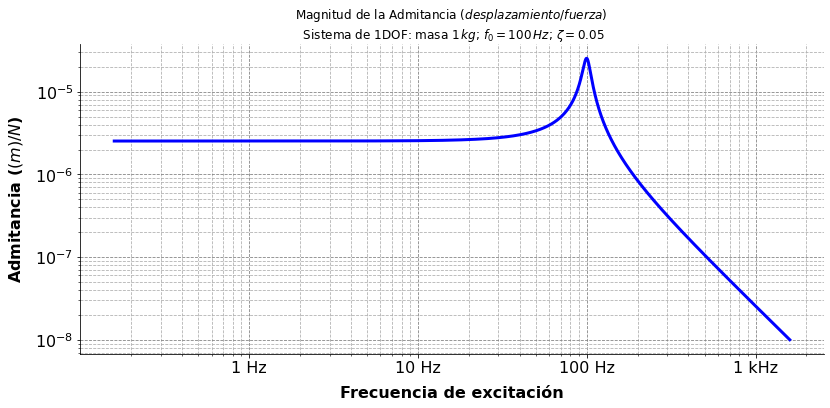

In [4]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()
    
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
    
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f,np.abs(admitancia),'b',linewidth = 3.0)

plt.yscale('log')
plt.xscale('log')
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Admitancia ($(m)/N$)', color='k', fontsize=16, weight='bold', labelpad=10)
ax.set_title('Magnitud de la Admitancia ($desplazamiento/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
plt.grid(True,which="both",ls="--")
for tl in ax.get_yticklabels():
    tl.set_color('k')

### Fase de la Admitancia

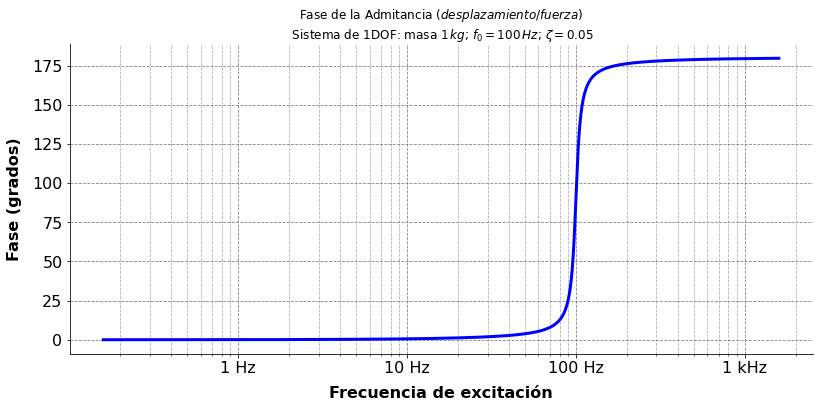

In [5]:
num = 2*z*w*w0 
den  = (w0**2) - (w**2) 
phi_admitancia = np.arctan2(num,den)*180/np.pi

fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f,phi_admitancia,'b',linewidth = 3.0)

ax.set_title('Fase de la Admitancia ($desplazamiento/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Fase (grados)', color='k', fontsize=16, weight='bold', labelpad=10);

### Parte real e imaginaria de la Admitancia

In [6]:
Re_admitancia = np.real(admitancia)
Im_admitancia = np.imag(admitancia)

### Parte Real vs Parte Imaginaria

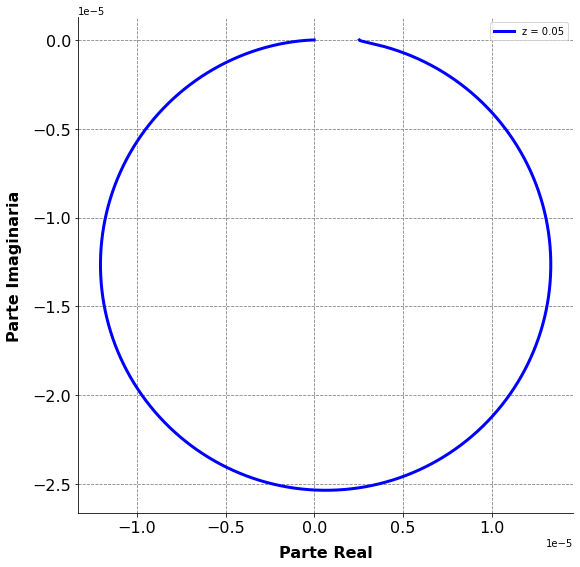

In [7]:
fig = plt.figure(figsize=figsize2)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.plot(Re_admitancia, Im_admitancia,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
ax.set_xlabel('Parte Real', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Parte Real vs Frecuencia

findfont: Font family ['nunito'] not found. Falling back to DejaVu Sans.


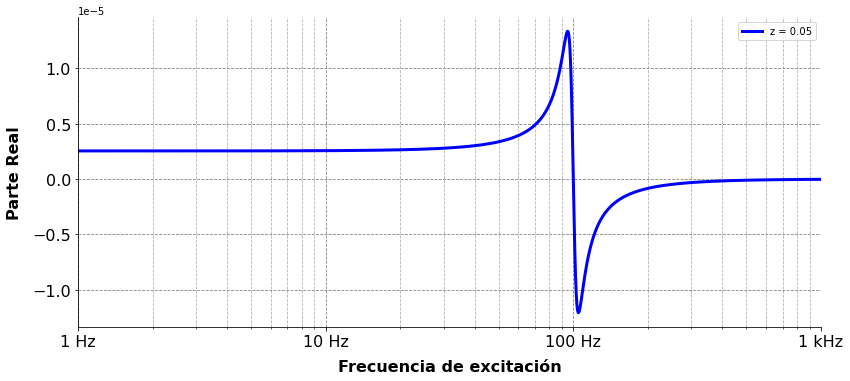

In [8]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Re_admitancia,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Real', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Parte Imaginaria vs Frecuencia

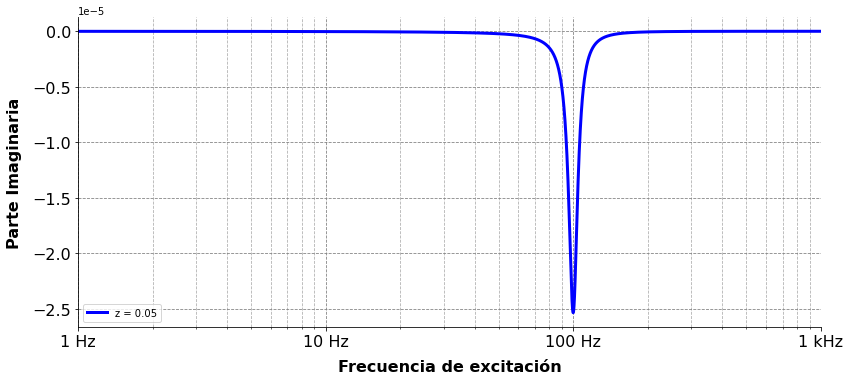

In [9]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Im_admitancia,'b', linewidth = 3.0 , label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Gráfico 3D Admitancia: Parte Real vs Parte Imaginaria vs Frecuencia

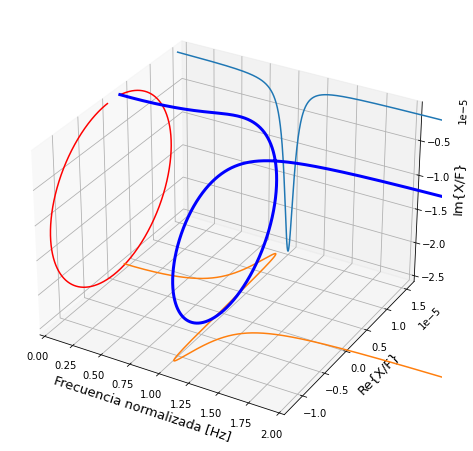

In [10]:


fig = plt.figure(figsize=figsize2);
ax = fig.add_subplot(projection='3d')

ax.set_xlim(0,2)
ax.set_xlabel("Frecuencia normalizada [Hz]",fontsize=fontsize-3);
ax.set_ylabel("Re{X/F}",fontsize=fontsize-3)
ax.set_zlabel("Im{X/F}",fontsize=fontsize-3)

ax.plot(Re_admitancia, Im_admitancia,zs=0, zdir="x",color='r');
ax.plot(f/f0,Im_admitancia,zs= 0.000015, zdir="y");
ax.plot(f/f0,Re_admitancia,zs=-0.000025, zdir="z");

plt.plot(f/f0, Re_admitancia, Im_admitancia, linewidth=3.0,color="b");

## Movilidad

\begin{align}
\large H(\omega) = \frac{V(j\omega)}{F(j\omega)} &=\large \frac{\frac{j\omega\omega_{0}^{2}}{k}}{\left[ \omega_{0}^{2} - \omega^{2} \right] + j (2\zeta \omega\omega_{0})}
\end{align}

### Magnitud de la Movilidad

In [11]:
num   = (1.j*w*(w0**2))/k
den   = (w0**2 -w**2) +1.j*2*z*w0*w
movilidad = num/den

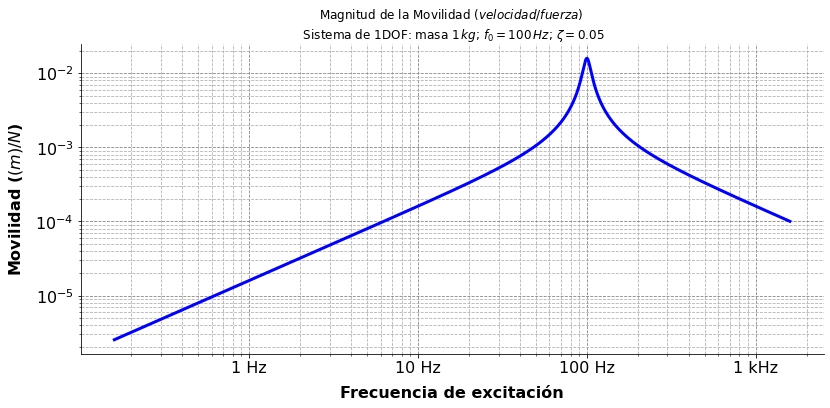

In [12]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()
    
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
    
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f,np.abs(movilidad),'b',linewidth = 3.0)

plt.yscale('log')
plt.xscale('log')
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Movilidad ($(m)/N$)', color='k', fontsize=16, weight='bold', labelpad=10)
ax.set_title('Magnitud de la Movilidad ($velocidad/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
plt.grid(True,which="both",ls="--")
for tl in ax.get_yticklabels():
    tl.set_color('k')

### Fase de la movilidad (Revisar)

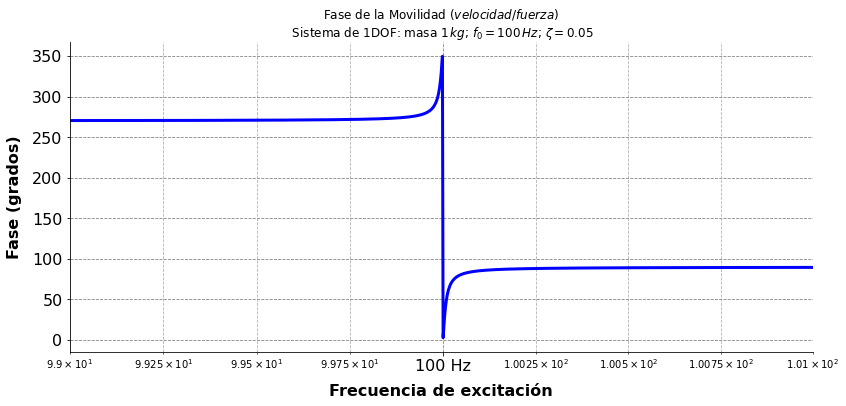

In [13]:
num = (-w0**2 + w**2)
den  = 2*z*w0 
phi_movilidad = np.arctan2(num,den)
phi_mov_fixed = np.mod(phi_movilidad,2*np.pi)*180/np.pi

fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.set_xlim([99,101])
ax.semilogx(f,phi_mov_fixed,'b',linewidth = 3.0)

ax.set_title('Fase de la Movilidad ($velocidad/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Fase (grados)', color='k', fontsize=16, weight='bold', labelpad=10);

### Parte Real e Imaginaria de la Movilidad

In [14]:
Re_movilidad = np.real(movilidad)
Im_movilidad = np.imag(movilidad)

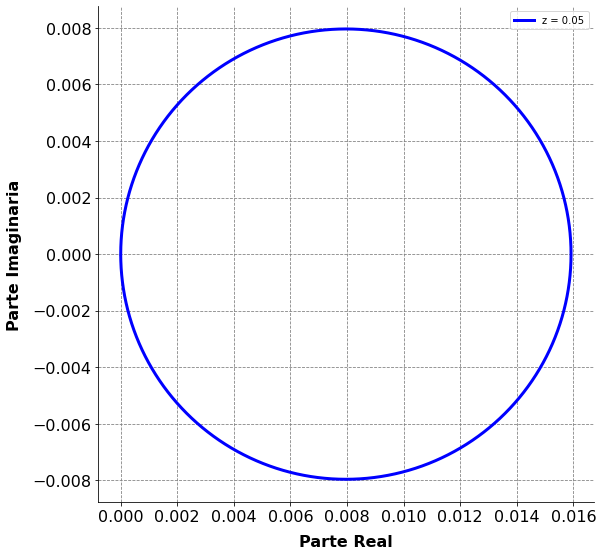

In [15]:
fig = plt.figure(figsize=figsize2)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.plot(Re_movilidad, Im_movilidad,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
ax.set_xlabel('Parte Real', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

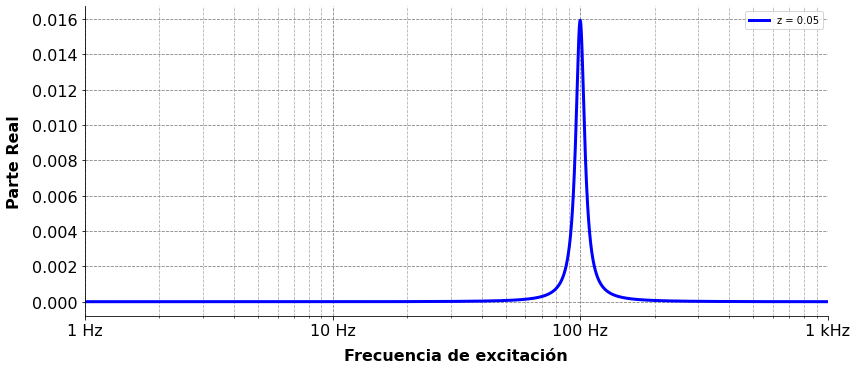

In [16]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Re_movilidad,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Real', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

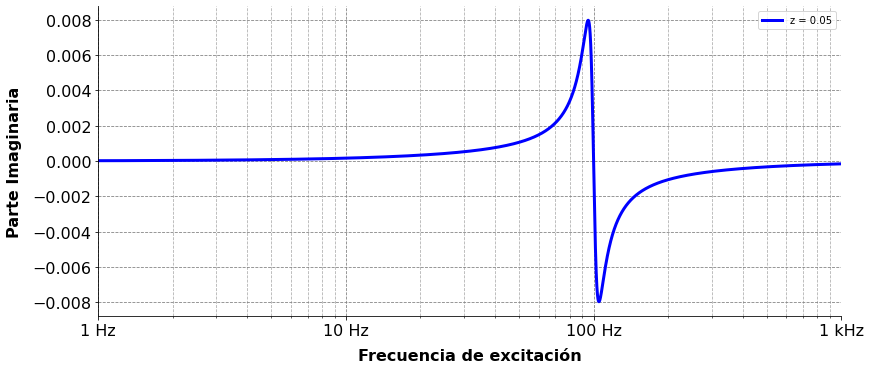

In [17]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Im_movilidad,'b', linewidth = 3.0 , label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Gráfico 3D Movilidad: Parte Real vs Parte Imaginaria vs Frecuencia

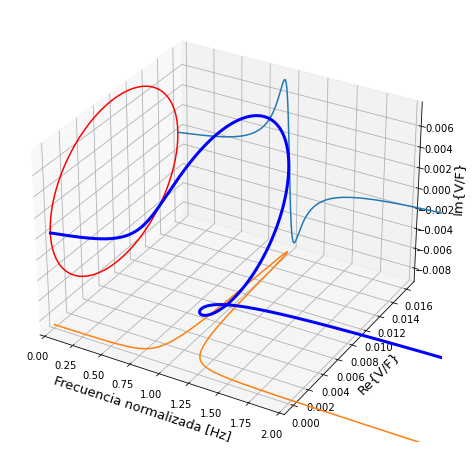

In [18]:


fig = plt.figure(figsize=figsize2);
ax = fig.add_subplot(projection='3d')

ax.set_xlim(0,2)
ax.set_xlabel("Frecuencia normalizada [Hz]",fontsize=fontsize-3);
ax.set_ylabel("Re{V/F}",fontsize=fontsize-3)
ax.set_zlabel("Im{V/F}",fontsize=fontsize-3)

ax.plot(Re_movilidad, Im_movilidad, zdir="x",color='r');
ax.plot(f/f0,Im_movilidad, zs=0.016,zdir="y");
ax.plot(f/f0,Re_movilidad, zs=-0.009, zdir="z");

plt.plot(f/f0, Re_movilidad, Im_movilidad, linewidth=3.0,color="b");

## Acelerancia (Inertancia)

\begin{align}
\large H(\omega) = \frac{A(j\omega)}{F(j\omega)} &=\large \frac{-\frac{\omega^2\omega_{0}^{2}}{k}}{\left[ \omega_{0}^{2} - \omega^{2} \right] + j (2\zeta \omega\omega_{0})}
\end{align}

In [19]:
num   = -((w**2)*(w0**2))/k
den   = (w0**2 -w**2) +1.j*2*z*w0*w
acelerancia = num/den

### Magnitud de la Acelerancia

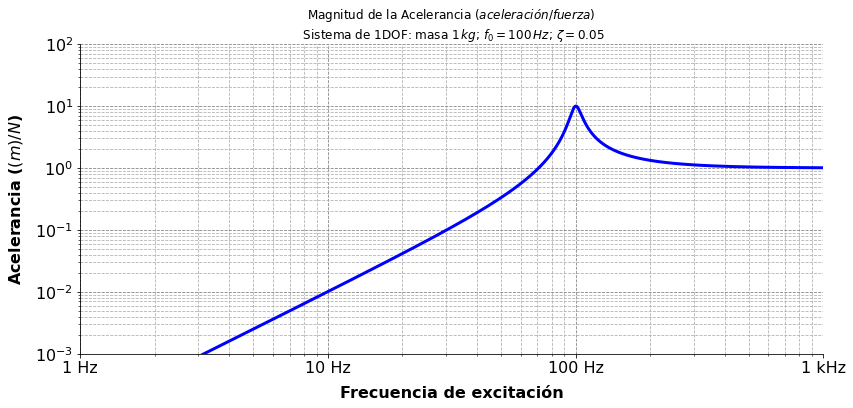

In [20]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()
    
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
    
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f,np.abs(acelerancia),'b',linewidth = 3.0)

plt.yscale('log')
plt.xscale('log')
ax.set_xlim(xlim)
ax.set_ylim(0.001,100)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Acelerancia ($(m)/N$)', color='k', fontsize=16, weight='bold', labelpad=10)
ax.set_title('Magnitud de la Acelerancia ($aceleración/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
plt.grid(True,which="both",ls="--")
for tl in ax.get_yticklabels():
    tl.set_color('k')

### Fase de la acelerancia (Revisar)

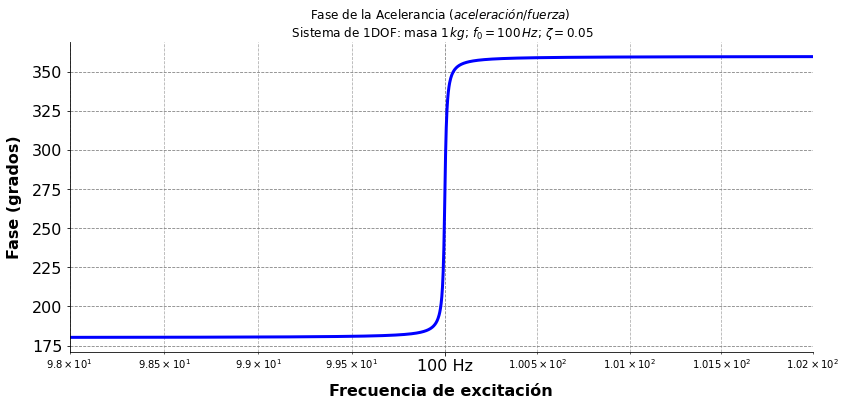

In [21]:
num  = 2*z*w0
den = (w0**2-w**2)
fase_acelerancia = num/den
phi_acelerancia = ( np.pi + np.arctan2(num,den))*180/np.pi
phi_mov_fixed = np.mod(phi_movilidad,2*np.pi)*180/np.pi

fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.setp(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.set_xlim([98,102])
ax.semilogx(f,phi_acelerancia,'b',linewidth = 3.0)

ax.set_title('Fase de la Acelerancia ($aceleración/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Fase (grados)', color='k', fontsize=16, weight='bold', labelpad=10);

### Parte Real y Parte Imaginaria de la Acelerancia

In [22]:
Re_acelerancia = np.real(acelerancia)
Im_acelerancia = np.imag(acelerancia)

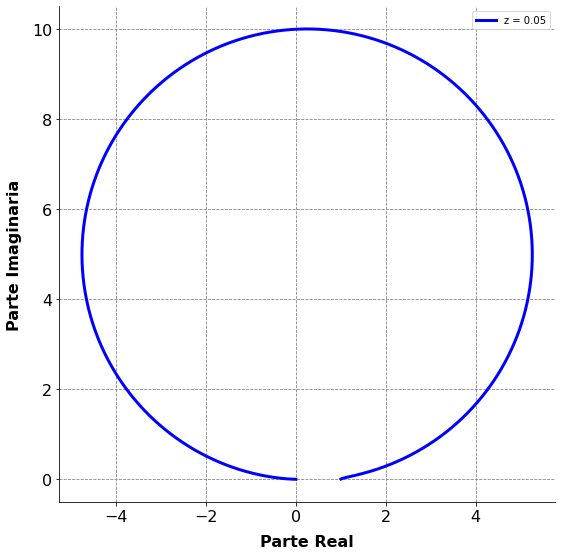

In [23]:
fig = plt.figure(figsize=figsize2)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.plot(Re_acelerancia, Im_acelerancia,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
ax.set_xlabel('Parte Real', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Parte Real vs Frecuencia

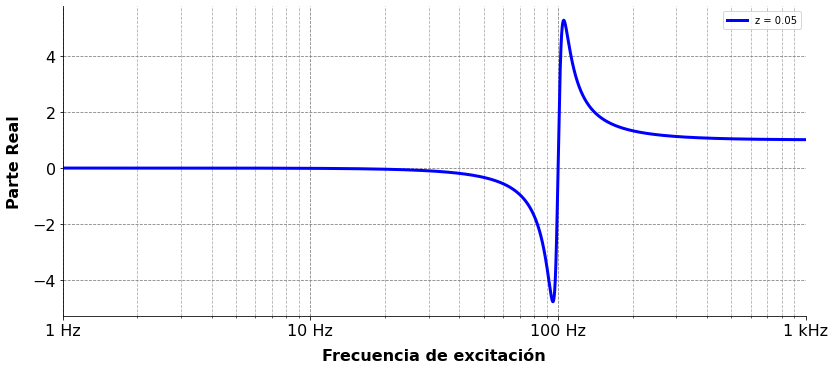

In [24]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Re_acelerancia,'b',linewidth = 3.0,label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Real', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Parte Imaginaria vs Frecuencia

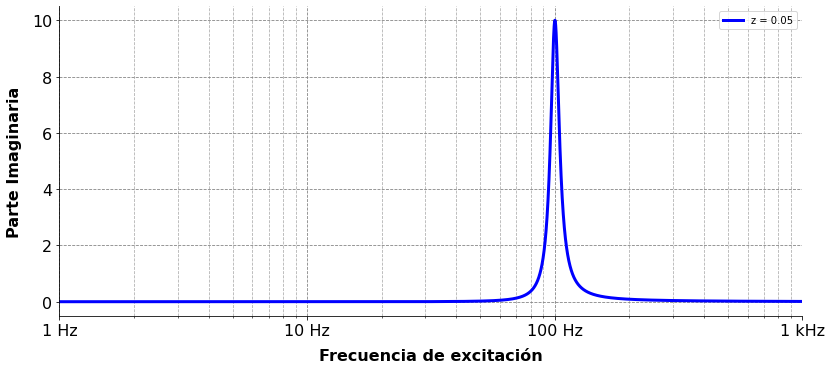

In [25]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()

plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(True, linestyle='--', color='0.5')
ax.set_axisbelow(True)

ax.semilogx(f, Im_acelerancia,'b', linewidth = 3.0 , label='z = '+str(z))

plt.grid(True,which="both",ls="--")
formatter0 = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter0)
ax.set_xlim(xlim)
ax.set_xlabel('Frecuencia de excitación', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Parte Imaginaria', color='k', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

### Gráfico 3D Acelerancia: Parte Real vs Parte Imaginaria vs Frecuencia

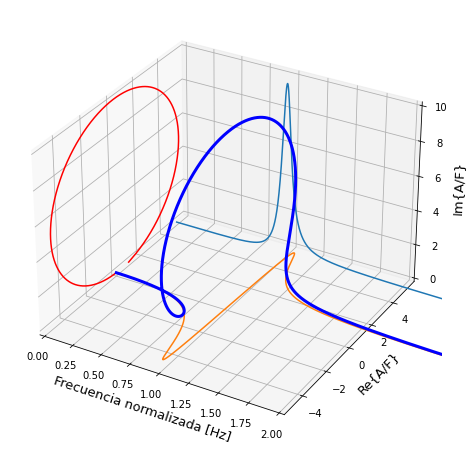

In [26]:


fig = plt.figure(figsize=figsize2);
ax = fig.add_subplot(projection='3d')

ax.set_xlim(0,2)
ax.set_xlabel("Frecuencia normalizada [Hz]",fontsize=fontsize-3);
ax.set_ylabel("Re{A/F}",fontsize=fontsize-3)
ax.set_zlabel("Im{A/F}",fontsize=fontsize-3)

ax.plot(Re_acelerancia, Im_acelerancia, zdir="x",color='r');
ax.plot(f/f0,Im_acelerancia, zs=5,zdir="y");
ax.plot(f/f0,Re_acelerancia, zs=0, zdir="z");

plt.plot(f/f0, Re_acelerancia, Im_acelerancia, linewidth=3.0,color="b");

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, step=0.01), FloatSlider(value=1.0, desc…

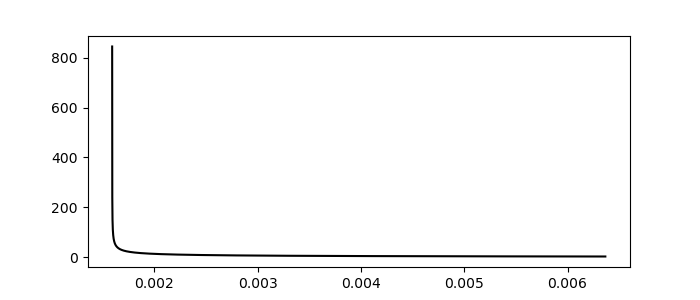

In [43]:
%matplotlib ipympl

tau = np.linspace(0.5, 10, 100)

F0 = 10

fig, ax = plt.subplots(figsize=(7,3))

def admitancia(m, k, z):
    w0 = np.sqrt(k/m)
    beta = z/(2*m)
    return (F0/m)/(np.sqrt((w**2-w0**2)+(2*beta*w)**2))

@widgets.interact(m =(0, 2, .01), k=(0, 2, .01), z=(0, 0.2, 0.0001))
def update(m = 1.0, k=1, z=0.01):
    [l.remove() for l in ax.lines]
    ax.plot(w/w0, admitancia(m, k, z), color='k')
    
plt.show()

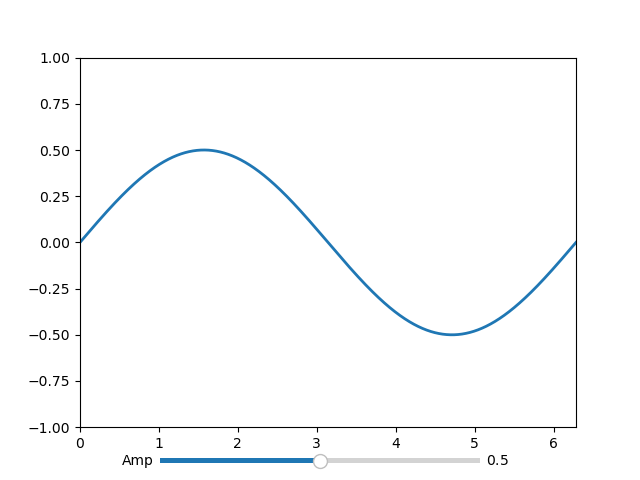

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0,TWOPI,-1,1])

axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)

def update(val):
    # amp is the current value of the slider
    amp = samp.val
    # update curve
    l.set_ydata(amp*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
samp.on_changed(update)

plt.show()